# Solidified Notebook for the Dayside Data
## Project: Magneto
Description: Collecting the dayside data into one notebook for straightforward reading and evalutions
> Author: Arnav Singh

In [20]:
import os
from datetime import datetime
import pandas as pd

# Define folder paths
folder_paths = ["dayside"]

# Function to convert date columns to datetime
def convert_to_datetime(df, year):
    date_columns = ['EQB_Date', 'SUB_Date', 'OCB_Date']
    for col in date_columns:
        df[col] = pd.to_timedelta(df[col], unit='s') + pd.Timestamp(year)
    return df

# List to accumulate DataFrames
all_dataframes = []

for folder_path in folder_paths:
    files = os.listdir(folder_path)
    
    for file_name in files:
        if file_name.startswith("d_") and file_name.endswith(".txt"):
            year_str = file_name.split("_")[1].split(".")[0]
            
            if year_str.isdigit():
                year = datetime(int(year_str), 1, 1)
                
                # Read the file using whitespace as a delimiter
                file_path = os.path.join(folder_path, file_name)
                dayside_df = pd.read_csv(
                    file_path,  # Correct file path usage
                    delim_whitespace=True,  # Use any whitespace as a delimiter
                    low_memory=False,
                    names=['EQB_Date', 'EQB_glat', 'EQB_glon', 'EQB_mlat', 'EQB_mlon', 'EQB_mlt', 'sc1', 
                        'SUB_Date', 'SUB_glat', 'SUB_glon', 'SUB_mlat', 'SUB_mlon', 'SUB_mlt', 'sc2',
                        'OCB_Date', 'OCB_glat', 'OCB_glon', 'OCB_mlat', 'OCB_mlon', 'OCB_mlt', 'sc3'
                    ]
                )

                # Convert the date columns to datetime
                dayside_df = convert_to_datetime(dayside_df, year)

                # Append the DataFrame to the list
                all_dataframes.append(dayside_df)

# Concatenate all DataFrames into a single DataFrame
combined_dayside_df = pd.concat(all_dataframes, ignore_index=True)

combined_dayside_df.sort_values(by = 'EQB_Date', inplace = True)
combined_dayside_df.describe()

,EQB_Date,EQB_glat,EQB_glon,EQB_mlat,EQB_mlon,EQB_mlt,sc1,SUB_Date,SUB_glat,SUB_glon,...,SUB_mlon,SUB_mlt,sc2,OCB_Date,OCB_glat,OCB_glon,OCB_mlat,OCB_mlon,OCB_mlt,sc3
count,631219,631219.000000,631219.000000,631219.000000,631219.000000,631219.000000,631219.000000,631219,631219.000000,631219.000000,...,631219.000000,631219.000000,631219.000000,631219,631219.000000,631219.000000,631219.000000,631219.000000,631219.000000,631219.000000
mean,2000-09-22 06:25:29.615132288,5.745049,118.062761,5.224109,-8.692862,7.560731,12.902218,2000-10-03 20:16:05.524951040,4.716075,125.773612,...,-6.872803,8.438406,12.902218,2000-10-31 11:45:18.831916928,5.003322,158.737878,4.075263,-4.473903,10.377233,12.902218
min,1982-12-31 23:59:59,-81.450000,0.000000,-87.920000,-180.000000,0.000000,6.000000,1982-12-31 23:59:59,-81.520000,0.000000,...,-180.000000,0.000000,6.000000,1982-12-31 23:59:59,-81.520000,0.000000,-89.830000,-180.000000,0.000000,6.000000
25%,1994-12-31 23:59:59,-51.580000,0.000000,-62.070000,-66.350000,0.000000,11.000000,1994-12-31 23:59:59,-60.300000,0.000000,...,-68.910000,0.000000,11.000000,1995-01-05 20:57:25,-71.840000,77.660000,-77.170000,-81.540000,6.460000,11.000000
50%,2001-12-31 23:59:59,0.000000,106.730000,0.000000,0.000000,7.160000,13.000000,2001-12-31 23:59:59,0.000000,123.520000,...,0.000000,7.910000,13.000000,2001-12-31 23:59:59,0.000000,163.320000,0.000000,0.000000,9.650000,13.000000
75%,2006-12-31 23:59:59,62.030000,210.640000,65.060000,30.130000,10.420000,15.000000,2007-02-04 22:26:03.500000,68.530000,210.370000,...,50.440000,13.600000,15.000000,2007-04-09 23:05:38,76.220000,232.540000,77.430000,69.380000,15.960000,15.000000
max,2012-12-31 23:27:06,81.520000,360.000000,87.380000,180.000000,23.910000,18.000000,2012-12-31 23:24:08,81.520000,360.000000,...,180.000000,23.910000,18.000000,2012-12-31 23:22:24,81.520000,360.000000,89.900000,180.000000,23.970000,18.000000
std,NaN,52.681822,111.279379,54.521206,86.603911,6.592322,3.204782,NaN,60.011571,108.036961,...,88.407731,6.500874,3.204782,NaN,70.502675,101.655735,73.572601,92.370944,5.757561,3.204782


There are more data points in this file than in the Nightside files! Amazing. However, would the structured-unstructured boundary or the equatorial boundary provide valuable data for this model for the dayside?

### Plan:
take the OCB data out of this dataframe and plot/save it to a parquet file. Then use parquet file in the 5min_OCBdata, and reproduce it in the 1HR_OCBdata as well. After those are done, continue playing around with the models and testing the parameters/hyperparameters, and to fit the the data well.

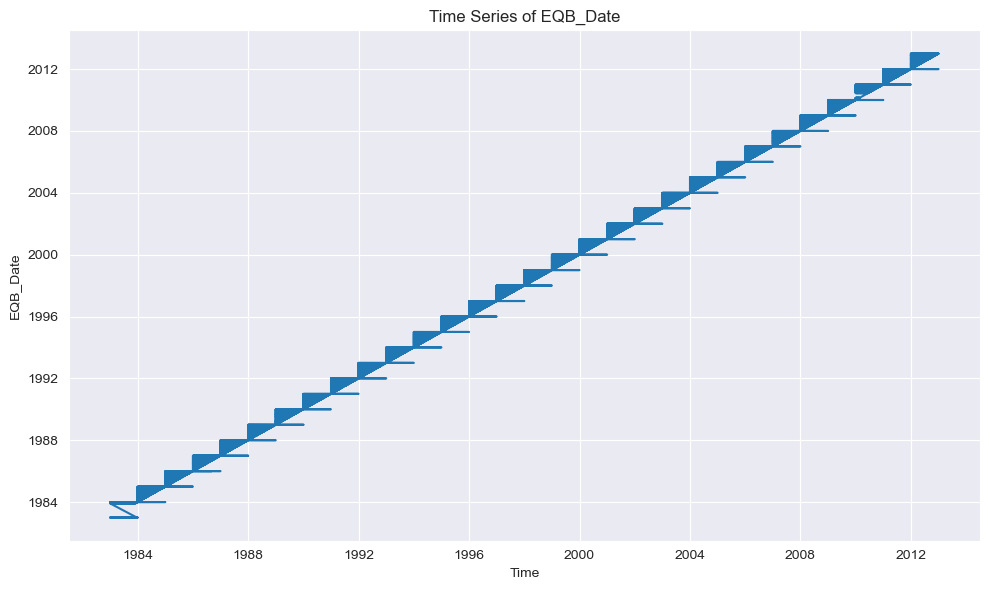

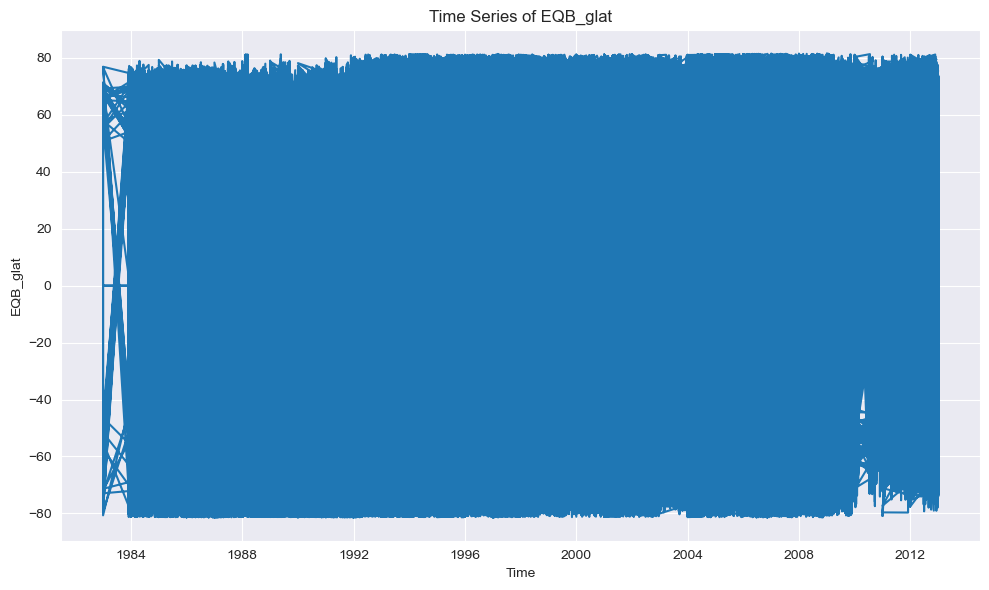

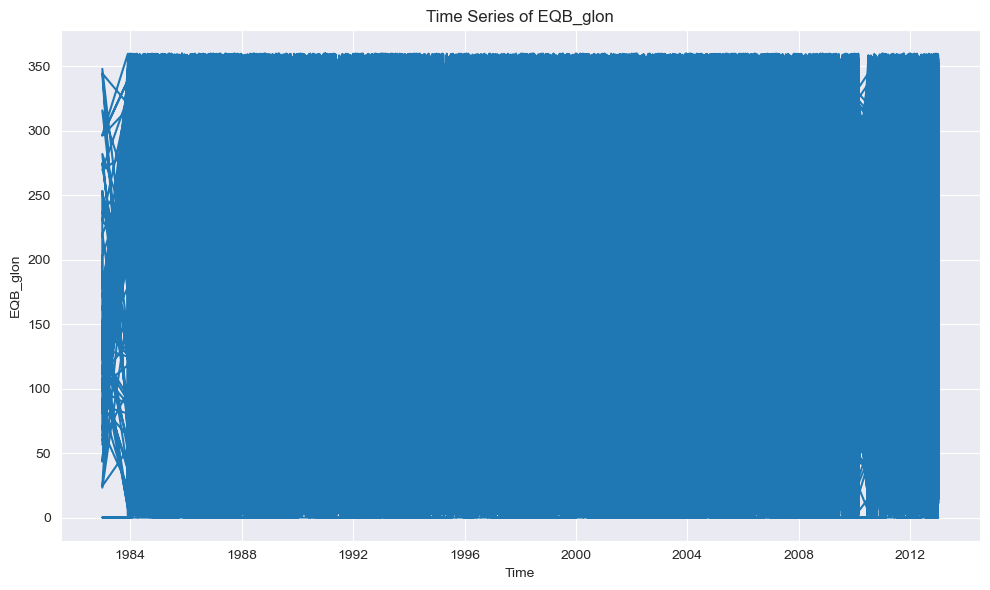

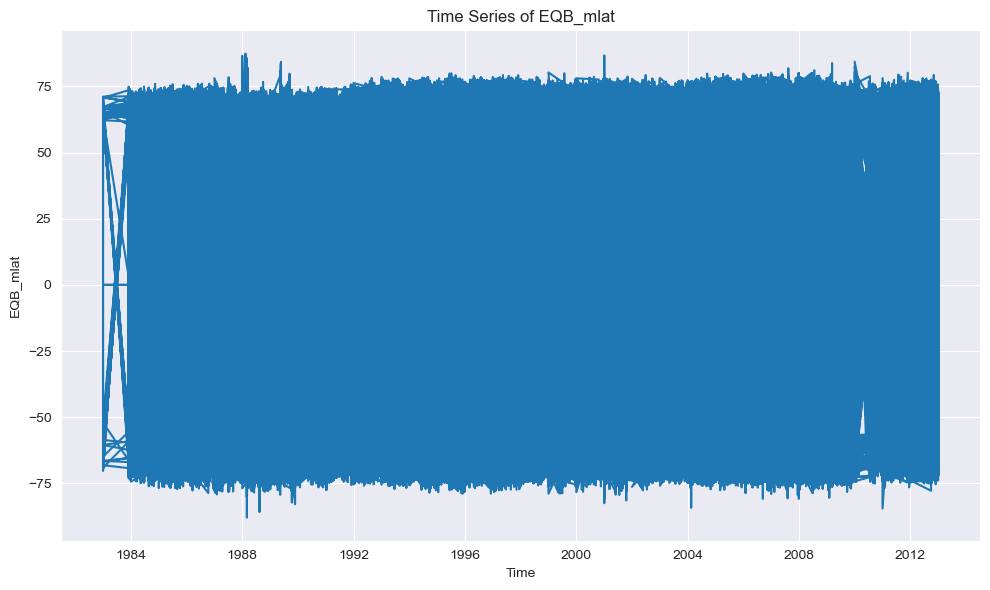

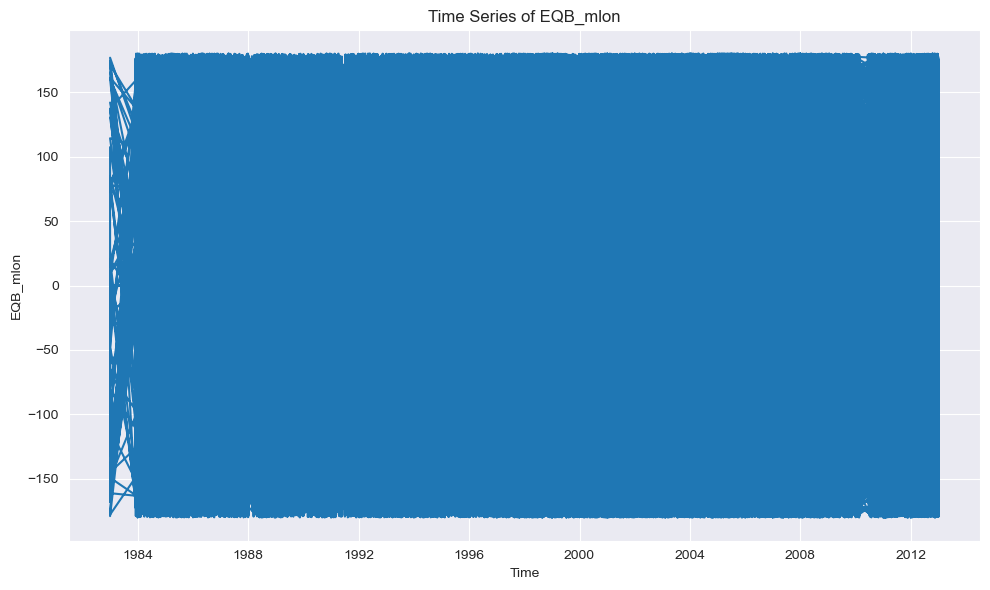

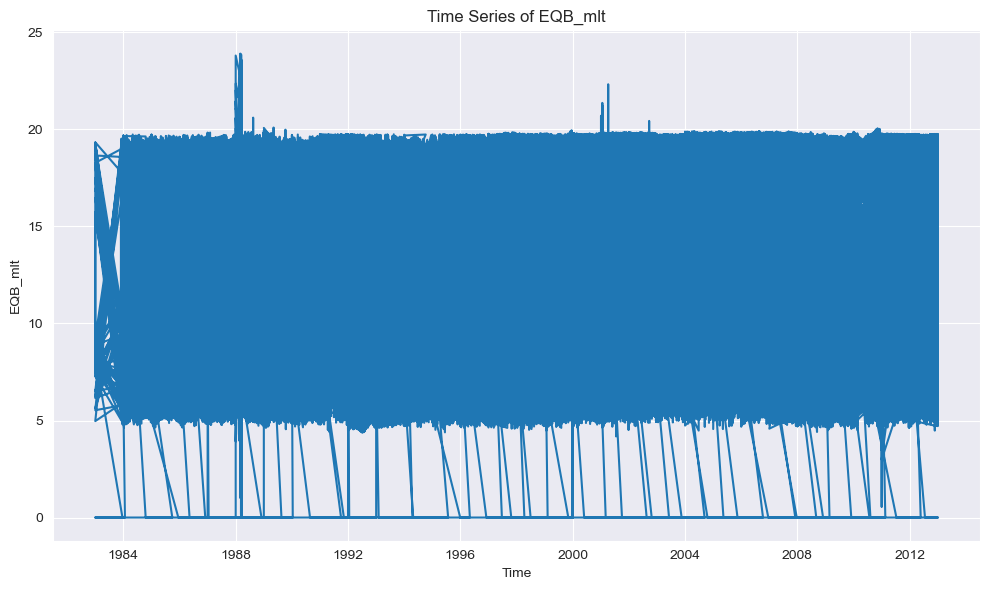

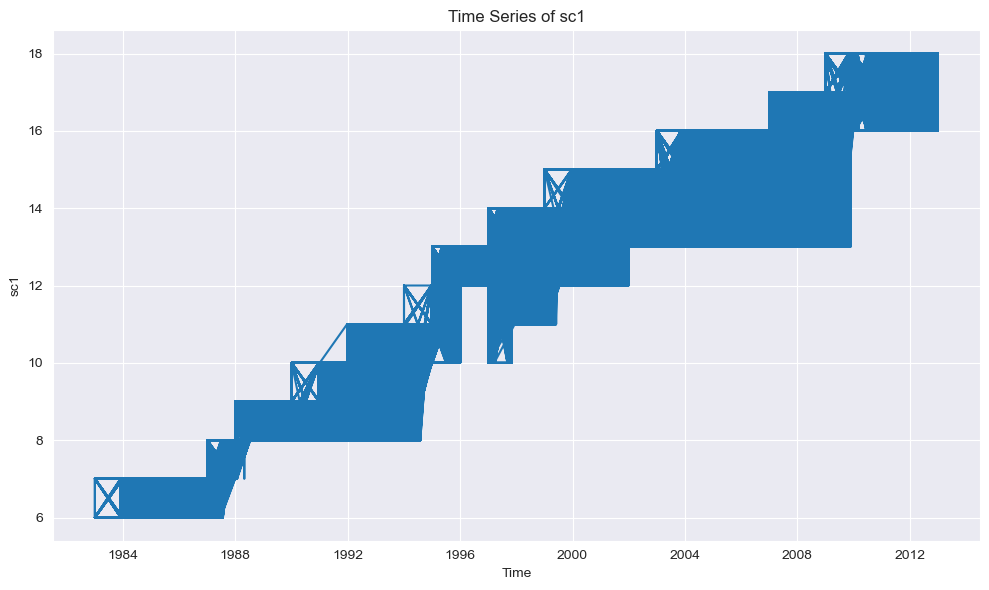

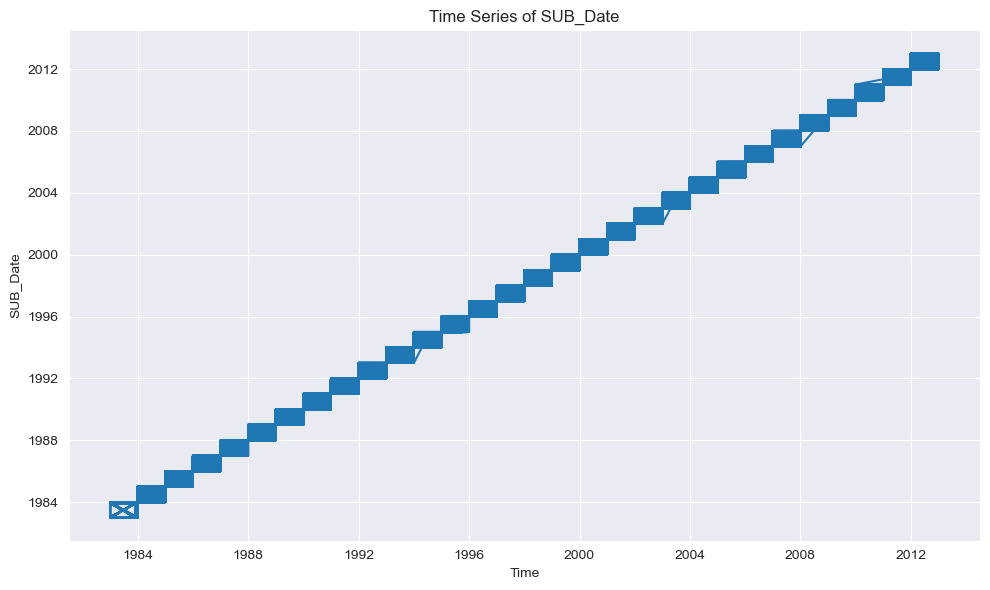

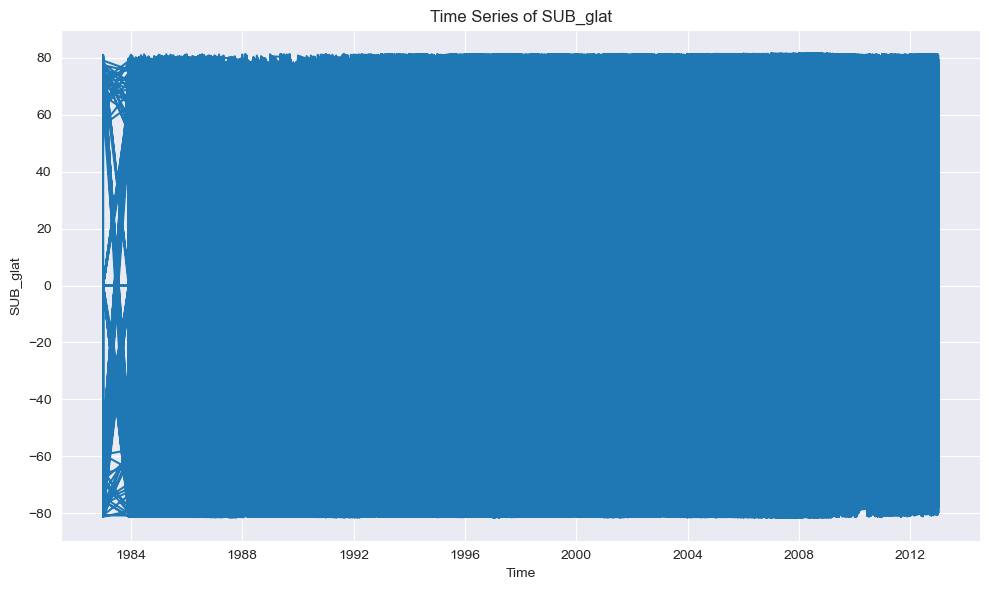

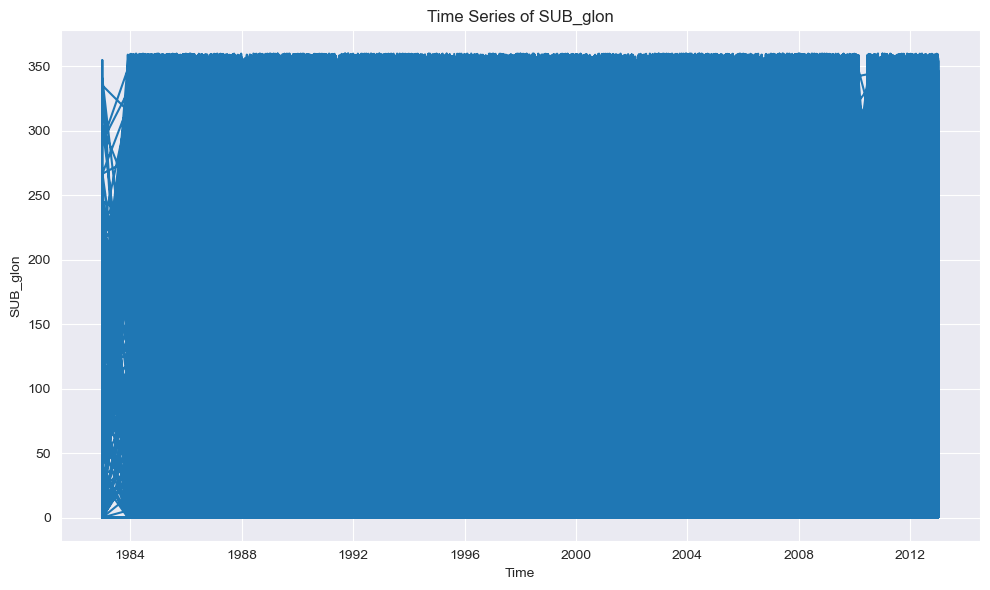

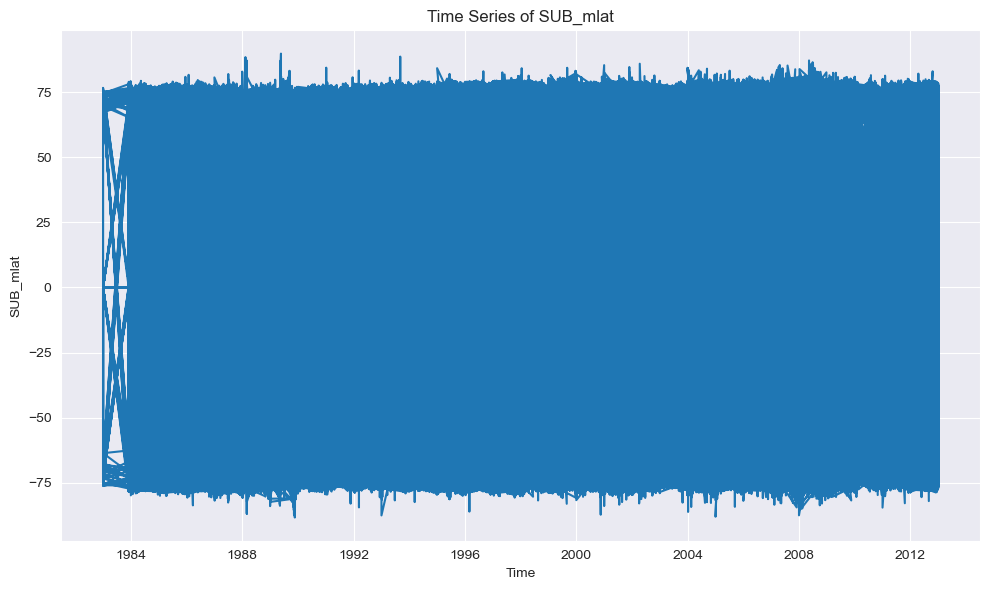

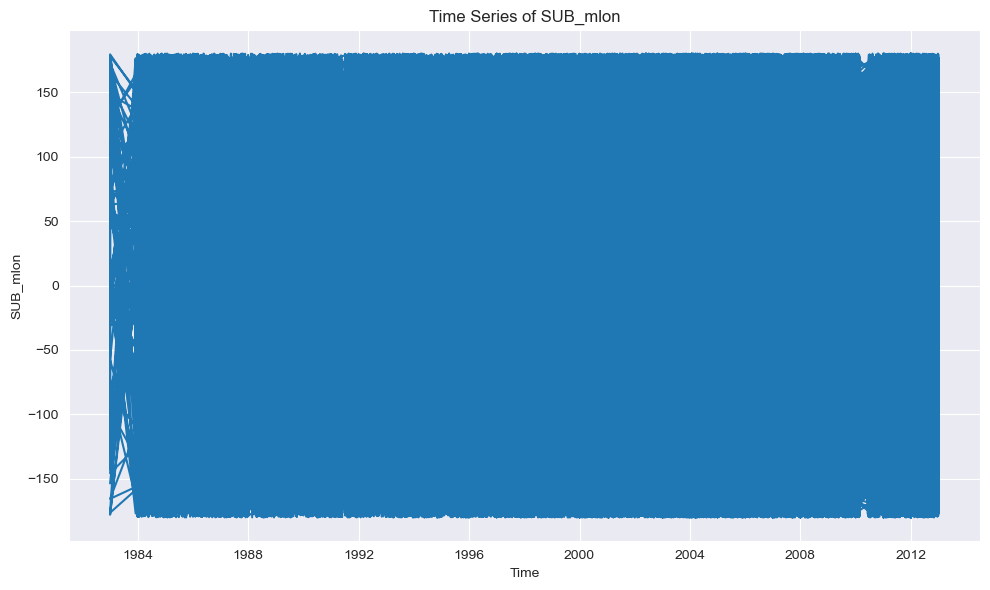

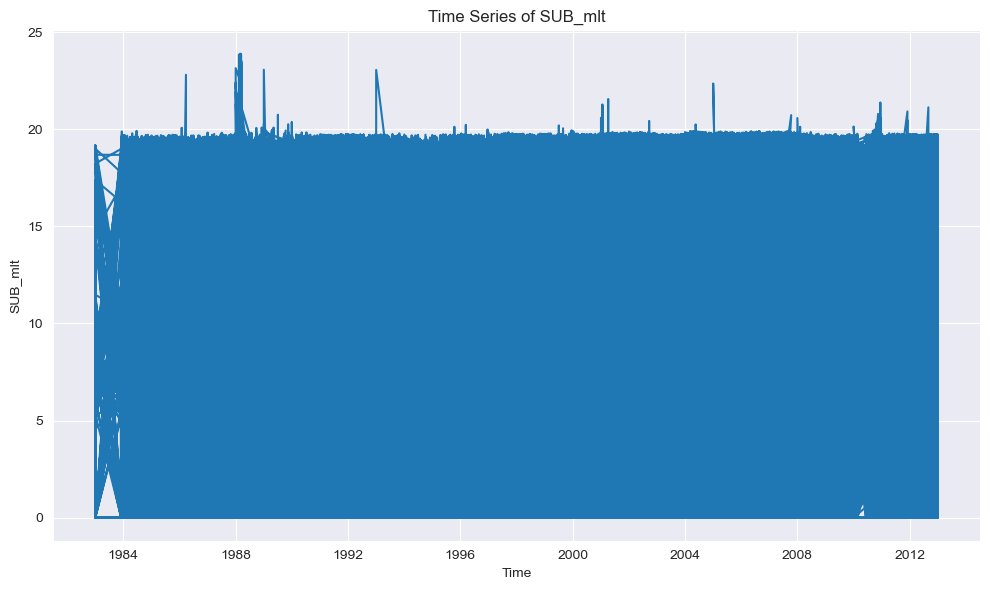

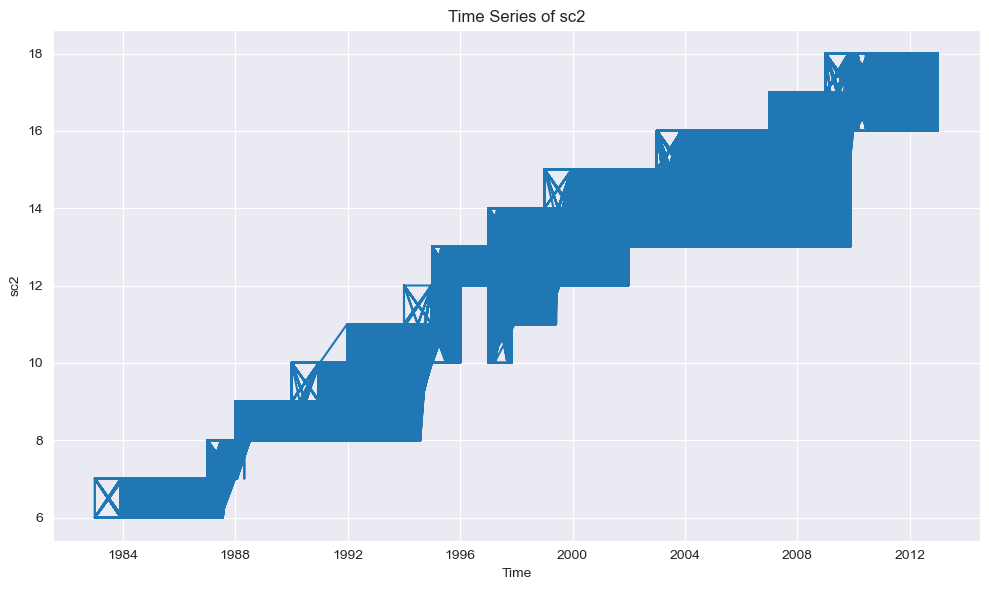

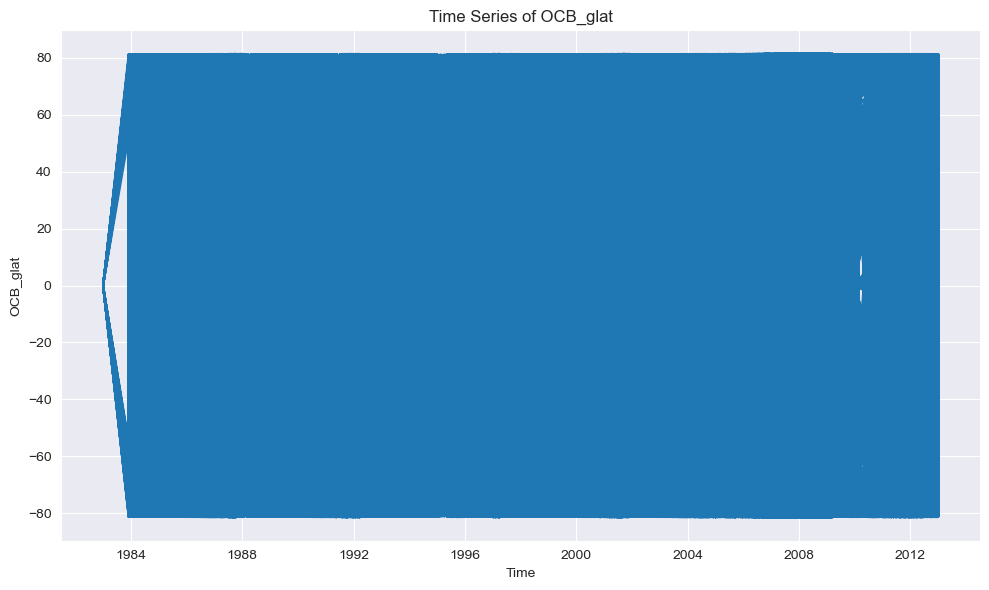

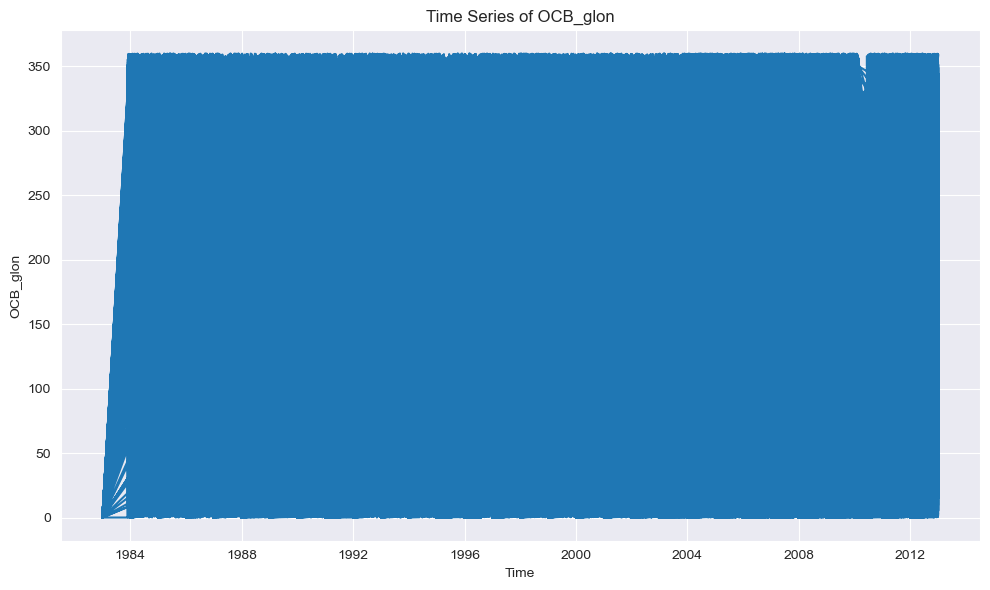

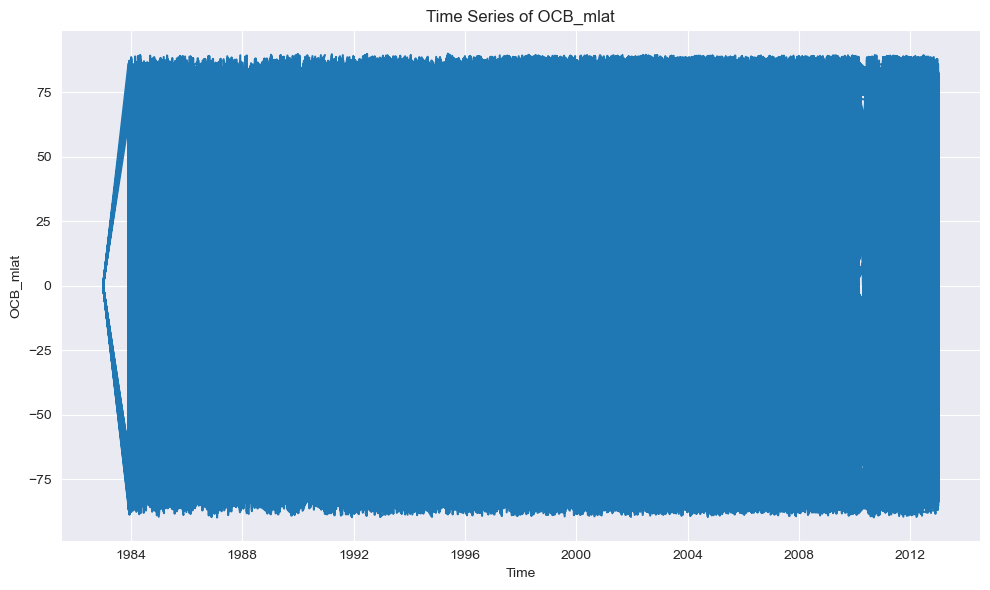

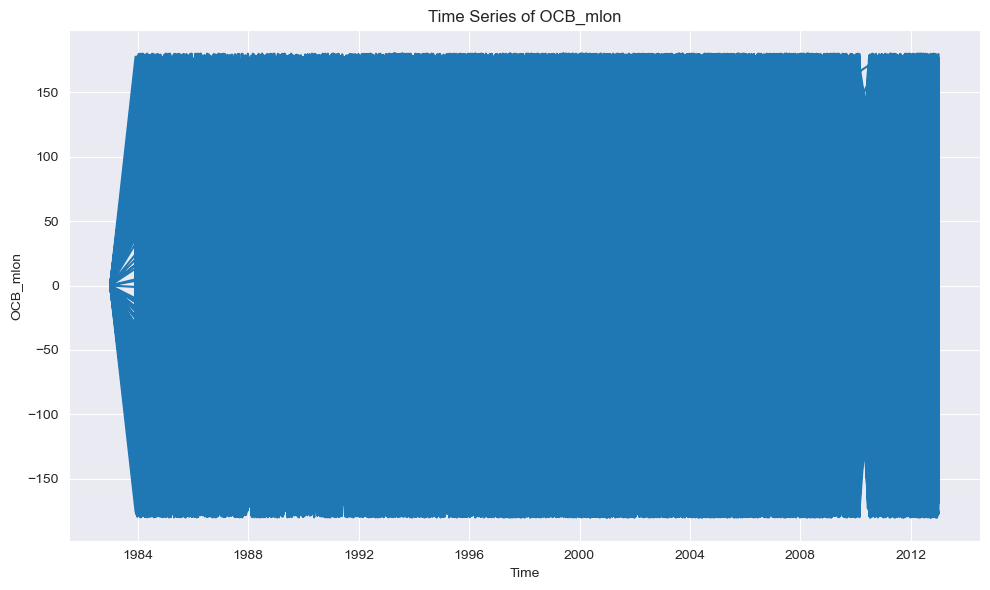

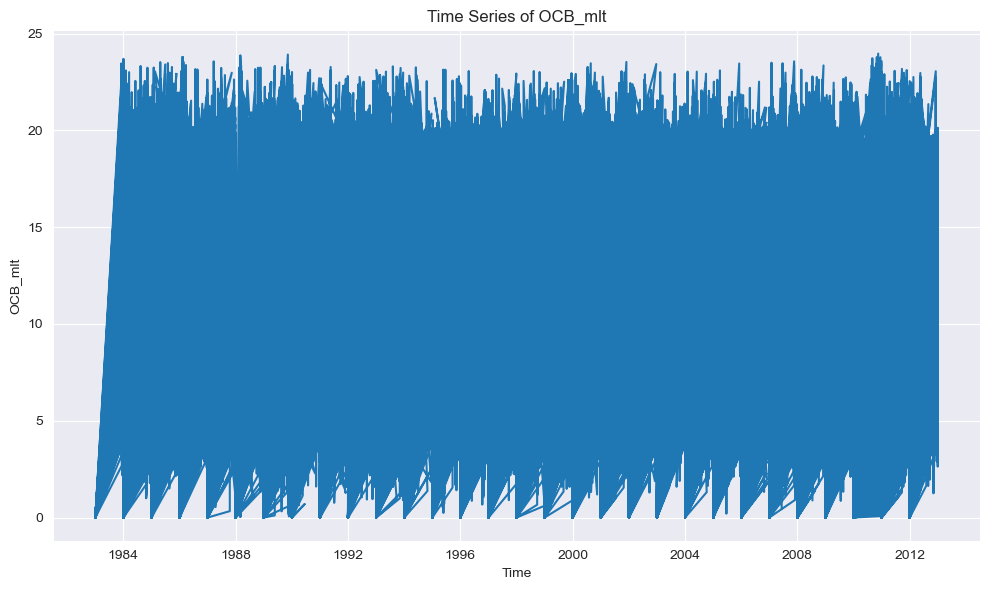

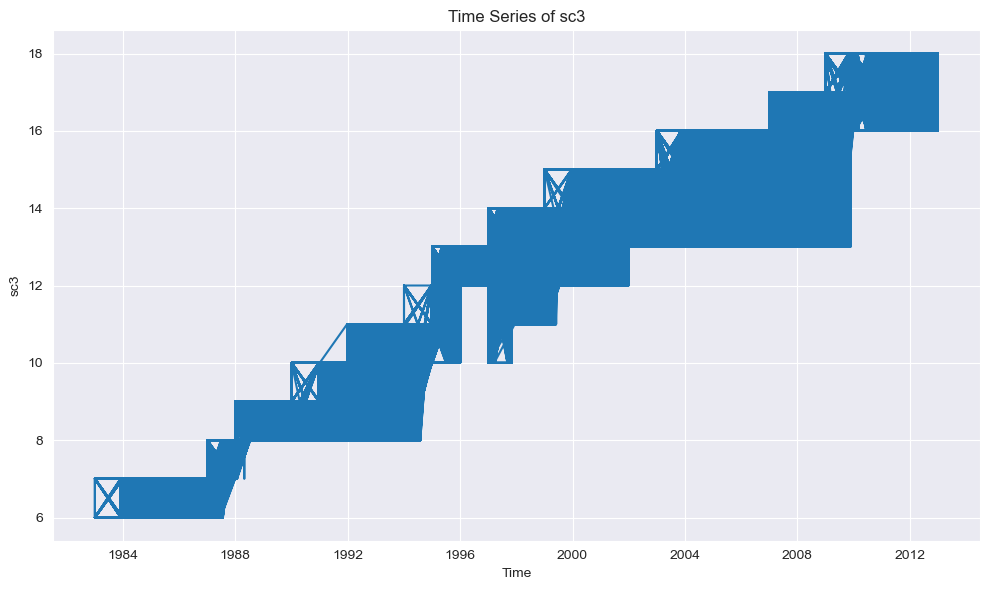

In [21]:
day_df = combined_dayside_df[['OCB_Date' , 'OCB_mlat' , 'OCB_mlt' ]]
import matplotlib.pyplot as plt
def plot_all_columns(df):
    """
    Plots all columns in the provided DataFrame against the given time column.
    Each column (except the specified time column) will be plotted on its own figure.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the time column and other data columns.
        time_col (str): The name of the time column in df.
    """
    # Assume 'time_col' is the name of your datetime column
    time_col = 'OCB_Date'
    # Ensure the time column is in the DataFrame
    if time_col not in df.columns:
        raise ValueError(f"Column '{time_col}' not found in DataFrame.")

    # Plot each column separately, skipping the time column
    for col in df.columns:
        if col != time_col:
            plt.figure(figsize=(10, 6))
            plt.plot(df[time_col], df[col])
            plt.xlabel('Time')
            plt.ylabel(col)
            plt.title(f'Time Series of {col}')
            plt.tight_layout()
            plt.show()
plot_all_columns(combined_dayside_df)

In [22]:
omni_df = pd.read_parquet("data/5minOMNI.parquet")
# Sort both DataFrames by the datetime column
day_df = day_df.sort_values('OCB_Date')
omni_df = omni_df.sort_values('EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ')

omni_df.describe()

,EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ,TIMESHIFT_seconds,MAG_AVG_B-VECTOR_nT,BX__GSE_nT,BY__GSM_nT,BZ__GSM_nT,FLOW_SPEED__GSE_km/s,VX_VELOCITY__GSE_km/s,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,5-M_AE_nT,5-M_AL-INDEX_nT,SYM/H_INDEX_nT,5-M_PC(N)-INDEX_
count,2016795,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06,2.016795e+06
mean,2002-04-13 13:56:46.250957440,2.189434e+03,6.040778e+00,4.087705e-02,1.495860e-02,-9.302978e-03,4.354915e+02,-4.342104e+02,-1.830091e+00,-1.792478e+00,6.578271e+00,2.267093e+00,1.926347e+02,-1.196129e+02,-1.275097e+01,1.028543e+00
min,1983-12-05 00:10:00,-1.065300e+04,2.100000e-01,-4.857000e+01,-4.797000e+01,-5.878000e+01,2.097000e+02,-1.135100e+03,-8.623000e+02,-2.821000e+02,3.000000e-02,1.000000e-02,1.000000e+00,-4.918000e+03,-4.880000e+02,-1.807000e+01
25%,1997-09-16 13:27:30,3.760000e+02,4.000000e+00,-2.710000e+00,-2.690000e+00,-1.850000e+00,3.569000e+02,-4.915000e+02,-1.610000e+01,-1.400000e+01,3.240000e+00,1.250000e+00,4.700000e+01,-1.620000e+02,-2.000000e+01,1.200000e-01
50%,2002-10-21 11:25:00,2.436000e+03,5.340000e+00,6.000000e-02,-3.000000e-02,0.000000e+00,4.114000e+02,-4.102000e+02,-4.200000e+00,-1.300000e+00,5.030000e+00,1.820000e+00,1.070000e+02,-5.300000e+01,-9.000000e+00,6.700000e-01
75%,2007-10-31 23:47:30,3.475000e+03,7.180000e+00,2.790000e+00,2.680000e+00,1.850000e+00,4.931000e+02,-3.560000e+02,1.010000e+01,1.080000e+01,8.080000e+00,2.710000e+00,2.640000e+02,-2.000000e+01,-1.000000e+00,1.630000e+00
max,2013-01-01 00:00:00,1.076800e+04,7.185000e+01,3.731000e+01,5.357000e+01,6.428000e+01,1.135900e+03,-9.810000e+01,3.199000e+02,4.338000e+02,7.199000e+01,8.951000e+01,4.634000e+03,5.800000e+01,1.360000e+02,3.272000e+01
std,NaN,1.777909e+03,3.248385e+00,3.787248e+00,4.225378e+00,3.516431e+00,1.050430e+02,1.045751e+02,2.437288e+01,2.280789e+01,5.336204e+00,1.852473e+00,2.152168e+02,1.586712e+02,1.996283e+01,1.436575e+00


In [23]:
day_df = day_df[~((day_df['OCB_Date'].dt.month == 12) & 
          (day_df['OCB_Date'].dt.day == 31) & 
          (day_df['OCB_Date'].dt.hour == 23) & 
          (day_df['OCB_Date'].dt.minute == 59) & 
          (day_df['OCB_Date'].dt.second == 59))]
day_df.describe()

,OCB_Date,OCB_mlat,OCB_mlt
count,567277,567277.000000,567277.000000
mean,2000-09-30 19:48:15.702638976,4.534616,11.546928
min,1983-12-01 00:38:06,-89.830000,0.030000
25%,1994-11-01 20:32:28,-77.730000,7.540000
50%,2001-11-19 10:43:16,71.780000,10.290000
75%,2007-04-13 15:39:54,77.920000,16.460000
max,2012-12-31 23:22:24,89.900000,23.970000
std,NaN,77.594954,4.835249


In [31]:
dayside_merged_df = pd.merge_asof(
    day_df,
    omni_df,
    left_on='OCB_Date',
    right_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ',
    tolerance=pd.Timedelta('5 minutes'),
    direction='nearest'
)
dayside_merged_df = dayside_merged_df.dropna()
dayside_merged_df.describe()

,OCB_Date,OCB_mlat,OCB_mlt,EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ,TIMESHIFT_seconds,MAG_AVG_B-VECTOR_nT,BX__GSE_nT,BY__GSM_nT,BZ__GSM_nT,FLOW_SPEED__GSE_km/s,VX_VELOCITY__GSE_km/s,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,5-M_AE_nT,5-M_AL-INDEX_nT,SYM/H_INDEX_nT,5-M_PC(N)-INDEX_
count,437644,437644.000000,437644.000000,437644,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000
mean,2003-06-01 14:36:20.500443008,6.040775,11.697393,2003-06-01 14:36:19.860800,2362.558701,5.907477,0.075834,-0.070200,-0.354826,436.225657,-434.981921,-1.259907,-1.993519,6.473615,2.223449,212.995867,-137.709360,-13.172677,1.177026
min,1983-12-05 00:47:40,-89.760000,0.110000,1983-12-05 00:50:00,-10189.000000,0.260000,-40.990000,-42.590000,-54.400000,234.400000,-1089.900000,-249.000000,-256.100000,0.030000,0.010000,1.000000,-3032.000000,-475.000000,-11.790000
25%,1999-02-11 06:19:51.750000,-77.820000,7.850000,1999-02-11 06:21:15,681.000000,3.920000,-2.600000,-2.710000,-2.150000,356.100000,-494.700000,-15.600000,-14.200000,3.190000,1.240000,51.000000,-195.000000,-20.000000,0.240000
50%,2004-04-11 13:21:29,72.470000,10.510000,2004-04-11 13:20:00,2618.000000,5.250000,0.110000,-0.150000,-0.290000,412.000000,-410.900000,-3.700000,-1.500000,4.970000,1.790000,127.000000,-72.000000,-10.000000,0.860000
75%,2008-01-29 00:29:56.500000,78.180000,16.470000,2008-01-29 00:30:00,3549.000000,7.060000,2.730000,2.560000,1.520000,496.400000,-355.200000,10.500000,10.400000,7.920000,2.650000,303.000000,-24.000000,-2.000000,1.840000
max,2012-12-31 23:22:24,89.900000,23.970000,2012-12-31 23:20:00,10655.000000,59.690000,35.230000,47.740000,41.270000,1094.500000,-234.300000,272.200000,419.700000,70.800000,89.510000,2945.000000,38.000000,109.000000,24.110000
std,NaN,77.666829,4.706631,NaN,1737.990144,3.111417,3.681877,4.132693,3.377761,105.762569,105.319832,24.221494,22.336946,5.245134,1.739334,225.276487,166.579801,19.631408,1.417505


In [33]:
### Newell Coupling parameter (2007) ###
import numpy as np
# 1. Extract the solar wind speed (v)
v = dayside_merged_df['FLOW_SPEED__GSE_km/s']

# 2. Compute BT
dayside_merged_df['BT'] = np.sqrt(dayside_merged_df['BY__GSM_nT']**2 + dayside_merged_df['BZ__GSM_nT']**2)

# 3. Compute clock angle qc (in radians)
# arctan2 takes arguments as arctan2(y, x)
dayside_merged_df['qc'] = np.arctan2(dayside_merged_df['BY__GSM_nT'], dayside_merged_df['BZ__GSM_nT'])

# 4. Compute sin^(8/3)(qc/2)
dayside_merged_df['sin_term'] = np.sin(dayside_merged_df['qc'] / 2.0)**(8.0/3.0)

# 5. Compute dFMP/dt
dayside_merged_df['dFMP_dt'] = (v**(4.0/3.0)) * (dayside_merged_df['BT']**(2.0/3.0)) * dayside_merged_df['sin_term']

dayside_merged_df.describe()

,OCB_Date,OCB_mlat,OCB_mlt,EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ,TIMESHIFT_seconds,MAG_AVG_B-VECTOR_nT,BX__GSE_nT,BY__GSM_nT,BZ__GSM_nT,FLOW_SPEED__GSE_km/s,...,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,5-M_AE_nT,5-M_AL-INDEX_nT,SYM/H_INDEX_nT,5-M_PC(N)-INDEX_,BT,qc,sin_term,dFMP_dt
count,437644,437644.000000,437644.000000,437644,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,...,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,213160.000000,213160.000000
mean,2003-06-01 14:36:20.500443008,6.040775,11.697393,2003-06-01 14:36:19.860800,2362.558701,5.907477,0.075834,-0.070200,-0.354826,436.225657,...,6.473615,2.223449,212.995867,-137.709360,-13.172677,1.177026,4.429847,-0.058896,0.461304,4097.295290
min,1983-12-05 00:47:40,-89.760000,0.110000,1983-12-05 00:50:00,-10189.000000,0.260000,-40.990000,-42.590000,-54.400000,234.400000,...,0.030000,0.010000,1.000000,-3032.000000,-475.000000,-11.790000,0.010000,-3.141593,0.000000,0.000000
25%,1999-02-11 06:19:51.750000,-77.820000,7.850000,1999-02-11 06:21:15,681.000000,3.920000,-2.600000,-2.710000,-2.150000,356.100000,...,3.190000,1.240000,51.000000,-195.000000,-20.000000,0.240000,2.455952,-1.720544,0.147689,1002.849111
50%,2004-04-11 13:21:29,72.470000,10.510000,2004-04-11 13:20:00,2618.000000,5.250000,0.110000,-0.150000,-0.290000,412.000000,...,4.970000,1.790000,127.000000,-72.000000,-10.000000,0.860000,3.813325,-0.146484,0.437412,2980.533893
75%,2008-01-29 00:29:56.500000,78.180000,16.470000,2008-01-29 00:30:00,3549.000000,7.060000,2.730000,2.560000,1.520000,496.400000,...,7.920000,2.650000,303.000000,-24.000000,-2.000000,1.840000,5.611355,1.615992,0.763063,5848.386906
max,2012-12-31 23:22:24,89.900000,23.970000,2012-12-31 23:20:00,10655.000000,59.690000,35.230000,47.740000,41.270000,1094.500000,...,70.800000,89.510000,2945.000000,38.000000,109.000000,24.110000,57.881329,3.141593,1.000000,111132.480707
std,NaN,77.666829,4.706631,NaN,1737.990144,3.111417,3.681877,4.132693,3.377761,105.762569,...,5.245134,1.739334,225.276487,166.579801,19.631408,1.417505,2.999276,1.830629,0.331910,4317.031442


In [34]:
dayside_merged_df.to_parquet('data/Dayside.parquet', engine='pyarrow', compression='zstd')